In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
db=pd.read_excel(r"C:\Users\hanra\OneDrive\Documents\Mini Projects\power Bi  mini projects\Diabeties.xlsx")
db

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,Yes
1,1.0,NaN,66.0,29.0,0.0,990.6,NaN,114.0,NO
2,8.0,NaN,64.0,0.0,NaN,NaN,0.672,32.0,Yes
3,NaN,NaN,66.0,23.0,94.0,28.1,0.167,NaN,NO
4,0.0,NaN,40.0,35.0,168.0,43.1,2.288,33.0,Yes
...,...,...,...,...,...,...,...,...,...
494,3.0,80.0,0.0,0.0,0.0,0.0,0.174,22.0,NO
495,6.0,166.0,74.0,0.0,0.0,990.6,0.304,66.0,NO
496,5.0,110.0,68.0,0.0,0.0,990.0,0.292,30.0,NO
497,2.0,81.0,72.0,15.0,76.0,30.1,0.547,25.0,NO


In [3]:
db.size

4491

In [2]:
db.shape

(499, 9)

In [12]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               488 non-null    float64
 1   Glucose                   491 non-null    float64
 2   BloodPressure             478 non-null    float64
 3   SkinThickness             483 non-null    float64
 4   Insulin                   492 non-null    float64
 5   BMI                       493 non-null    float64
 6   DiabetesPedigreeFunction  486 non-null    float64
 7   Age                       495 non-null    float64
 8   Outcome                   499 non-null    object 
dtypes: float64(8), object(1)
memory usage: 35.2+ KB


In [2]:
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,488.000000,491.000000,478.000000,483.000000,492.000000,493.000000,486.000000,495.000000
mean,3.811475,175.798371,68.654812,40.453416,109.514228,80.859635,0.501676,83.034343
std,3.357744,321.688590,19.385099,126.489972,477.856865,182.212195,0.362098,202.178712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.700000,0.237000,24.000000
50%,3.000000,117.000000,70.000000,23.000000,36.000000,33.300000,0.403500,30.000000
75%,6.000000,146.000000,80.000000,35.000000,122.750000,42.000000,0.676250,44.000000
max,17.000000,4499.000000,122.000000,990.000000,9905.000000,990.800000,2.420000,990.000000


In [4]:
db.isna().sum()

Pregnancies                 11
Glucose                      8
BloodPressure               21
SkinThickness               16
Insulin                      7
BMI                          6
DiabetesPedigreeFunction    13
Age                          4
Outcome                      0
dtype: int64

In [3]:
db.describe(include='O')

,Outcome
count,499
unique,2
top,NO
freq,317


In [4]:
db['Outcome'].value_counts()

Outcome
NO     317
Yes    182
Name: count, dtype: int64

In [5]:
db['Age'].unique()

array([ 50., 114.,  32.,  nan,  33.,  30., 990.,  29.,  53., 190.,  57.,
        59.,  51.,  27.,  41.,  43.,  22.,  38.,  60.,  28.,  45.,  35.,
        46.,  56.,  37.,  48.,  54.,  40.,  25.,  24.,  58.,  42.,  21.,
        44.,  39.,  36.,  23.,  61.,  69.,  62.,  55.,  65.,  47.,  52.,
        66.,  49.,  63.,  67.,  72.,  81.])

In [2]:
db['Glucose'].isna().sum()

8

In [3]:
db.isna().sum()

Pregnancies                 11
Glucose                      8
BloodPressure               21
SkinThickness               16
Insulin                      7
BMI                          6
DiabetesPedigreeFunction    13
Age                          4
Outcome                      0
dtype: int64

In [34]:
db['SkinThickness'].isna().sum()

16

In [33]:
db['BMI'].isna().sum()

6

In [147]:
db['DiabetesPedigreeFunction'].isna().sum()

13

In [148]:
db['DiabetesPedigreeFunction'].unique()

array([0.627  ,     nan, 0.672  , 0.167  , 2.288  , 0.201  , 0.119  ,
       0.158  , 0.232  , 0.191  , 0.537  , 0.398  , 0.587  , 0.484  ,
       0.551  , 0.183  , 0.529  , 0.704  , 0.388  , 0.9903 , 0.254  ,
       0.205  , 0.257  , 0.487  , 0.337  , 0.546  , 0.851  , 0.9907 ,
       0.188  , 0.512  , 0.966  , 0.42   , 0.665  , 0.503  , 1.39   ,
       0.271  , 0.696  , 0.235  , 0.721  , 0.294  , 1.893  , 0.564  ,
       0.586  , 0.1904 , 0.305  , 0.491  , 0.599  , 0.1902 , 0.467  ,
       0.718  , 0.248  , 0.962  , 1.781  , 0.173  , 0.304  , 0.27   ,
       0.699  , 0.258  , 0.203  , 0.855  , 0.845  , 0.1149 , 0.189  ,
       0.867  , 0.411  , 0.583  , 0.2114 , 0.396  , 0.14   , 0.391  ,
       0.37   , 0.307  , 0.102  , 0.767  , 0.237  , 0.227  , 0.698  ,
       0.178  , 0.324  , 0.153  , 0.165  , 0.443  , 0.9901 , 0.277  ,
       0.761  , 0.255  , 0.13   , 0.323  , 0.356  , 0.325  , 1.222  ,
       0.179  , 0.9902 , 0.283  , 0.93   , 0.801  , 0.207  , 0.287  ,
       0.336  , 0.24

In [37]:
db['DiabetesPedigreeFunction'].describe()

count    486.000000
mean       0.501676
std        0.362098
min        0.078000
25%        0.237000
50%        0.403500
75%        0.676250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

In [5]:
db_new=db.dropna(axis=0)

In [150]:
db_new

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,updated_Age,Pregnancies_updated
0,148.0,72.0,35.0,0.0,33.6,0.6270,50,6
27,97.0,66.0,15.0,140.0,23.2,0.4870,22,1
29,117.0,92.0,0.0,0.0,190.1,0.3370,38,5
31,1058.0,76.0,36.0,245.0,114.6,0.8510,28,3
32,88.0,58.0,11.0,54.0,24.8,0.9907,22,3
...,...,...,...,...,...,...,...,...
494,80.0,0.0,0.0,0.0,0.0,0.1740,22,3
495,166.0,74.0,0.0,0.0,990.6,0.3040,66,6
496,110.0,68.0,0.0,0.0,990.0,0.2920,30,5
497,81.0,72.0,15.0,76.0,30.1,0.5470,25,2


In [151]:
db_new.isna().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
updated_Age                 0
Pregnancies_updated         0
dtype: int64

In [16]:
db_new.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI    DiabetesPedigreeFunction  Age   Outcome
0.0          74.0     52.0           10.0           36.0     27.8   0.9909                    22.0  NO         1
6.0          87.0     80.0           0.0            0.0      23.2   0.0840                    32.0  NO         1
5.0          106.0    82.0           30.0           0.0      39.5   0.2860                    38.0  NO         1
             105.0    72.0           29.0           325.0    36.9   0.1590                    28.0  NO         1
             99.0     74.0           27.0           0.0      29.0   0.2030                    32.0  NO         1
                                                                                                              ..
1.0          1114.0   64.0           14.0           415.0    23.7   0.3890                    21.0  NO         1
             193.0    50.0           16.0           375.0    25.9   0.6550                    24.0  N

In [20]:
db_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450 entries, 0 to 498
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               450 non-null    float64
 1   Glucose                   450 non-null    float64
 2   BloodPressure             450 non-null    float64
 3   SkinThickness             450 non-null    float64
 4   Insulin                   450 non-null    float64
 5   BMI                       450 non-null    float64
 6   DiabetesPedigreeFunction  450 non-null    float64
 7   Age                       450 non-null    float64
 8   Outcome                   450 non-null    object 
dtypes: float64(8), object(1)
memory usage: 35.2+ KB


In [7]:
#Renaming and type casting the 'Age' :
db_new['updated_Age']=db_new['Age'].astype('int')

C:\Users\hanra\AppData\Local\Temp\ipykernel_20468\2056762325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_new['updated_Age']=db_new['Age'].astype('int')


In [8]:
db_new['updated_Age'].dtypes

dtype('int32')

In [159]:
db_new

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,updated_Age,Pregnancies_updated
0,148.0,72.0,35.0,0.0,33.6,0.6270,50,6
27,97.0,66.0,15.0,140.0,23.2,0.4870,22,1
29,117.0,92.0,0.0,0.0,190.1,0.3370,38,5
31,1058.0,76.0,36.0,245.0,114.6,0.8510,28,3
32,88.0,58.0,11.0,54.0,24.8,0.9907,22,3
...,...,...,...,...,...,...,...,...
494,80.0,0.0,0.0,0.0,0.0,0.1740,22,3
495,166.0,74.0,0.0,0.0,990.6,0.3040,66,6
496,110.0,68.0,0.0,0.0,990.0,0.2920,30,5
497,81.0,72.0,15.0,76.0,30.1,0.5470,25,2


In [9]:
#Removing the 'Age ' from the Data set:
db_new.pop('Age')

0      50.0
27     22.0
29     38.0
31     28.0
32     22.0
       ... 
494    22.0
495    66.0
496    30.0
497    25.0
498    55.0
Name: Age, Length: 450, dtype: float64

In [155]:
db_new

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,updated_Age,Pregnancies_updated
0,148.0,72.0,35.0,0.0,33.6,0.6270,50,6
27,97.0,66.0,15.0,140.0,23.2,0.4870,22,1
29,117.0,92.0,0.0,0.0,190.1,0.3370,38,5
31,1058.0,76.0,36.0,245.0,114.6,0.8510,28,3
32,88.0,58.0,11.0,54.0,24.8,0.9907,22,3
...,...,...,...,...,...,...,...,...
494,80.0,0.0,0.0,0.0,0.0,0.1740,22,3
495,166.0,74.0,0.0,0.0,990.6,0.3040,66,6
496,110.0,68.0,0.0,0.0,990.0,0.2920,30,5
497,81.0,72.0,15.0,76.0,30.1,0.5470,25,2


In [14]:
#Renaming  and typecasting the 'Pregnancies':
db_new['Pregnancies_updated']=db_new['Pregnancies'].astype('int')

C:\Users\hanra\AppData\Local\Temp\ipykernel_20468\2326695706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_new['Pregnancies_updated']=db_new['Pregnancies'].astype('int')


In [15]:
db_new['Pregnancies_updated'].dtypes

dtype('int32')

In [56]:
db_new.pop('Pregnancies')

0      6.0
27     1.0
29     5.0
31     3.0
32     3.0
      ... 
494    3.0
495    6.0
496    5.0
497    2.0
498    7.0
Name: Pregnancies, Length: 450, dtype: float64

In [57]:
db_new

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,updated_Age,Pregnancies_updated
0,148.0,72.0,35.0,0.0,33.6,0.6270,Yes,50,6
27,97.0,66.0,15.0,140.0,23.2,0.4870,NO,22,1
29,117.0,92.0,0.0,0.0,190.1,0.3370,NO,38,5
31,1058.0,76.0,36.0,245.0,114.6,0.8510,Yes,28,3
32,88.0,58.0,11.0,54.0,24.8,0.9907,NO,22,3
...,...,...,...,...,...,...,...,...,...
494,80.0,0.0,0.0,0.0,0.0,0.1740,NO,22,3
495,166.0,74.0,0.0,0.0,990.6,0.3040,NO,66,6
496,110.0,68.0,0.0,0.0,990.0,0.2920,NO,30,5
497,81.0,72.0,15.0,76.0,30.1,0.5470,NO,25,2


In [58]:
db_new.value_counts()

Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Outcome  updated_Age  Pregnancies_updated
0.0      48.0           20.0           0.0      24.7  0.1400                    NO       22           1                      1
145.0    0.0            0.0            0.0      44.2  0.6300                    Yes      114          0                      1
138.0    0.0            0.0            0.0      36.3  0.9330                    Yes      25           0                      1
137.0    108.0          0.0            0.0      48.8  0.2270                    Yes      37           5                      1
         84.0           27.0           0.0      27.3  0.2114                    NO       59           0                      1
                                                                                                                            ..
105.0    0.0            0.0            0.0      0.0   0.3050                    NO       24           7             

In [63]:
db_new

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,updated_Age,Pregnancies_updated
0,148.0,72.0,35.0,0.0,33.6,0.6270,Yes,50,6
27,97.0,66.0,15.0,140.0,23.2,0.4870,NO,22,1
29,117.0,92.0,0.0,0.0,190.1,0.3370,NO,38,5
31,1058.0,76.0,36.0,245.0,114.6,0.8510,Yes,28,3
32,88.0,58.0,11.0,54.0,24.8,0.9907,NO,22,3
...,...,...,...,...,...,...,...,...,...
494,80.0,0.0,0.0,0.0,0.0,0.1740,NO,22,3
495,166.0,74.0,0.0,0.0,990.6,0.3040,NO,66,6
496,110.0,68.0,0.0,0.0,990.0,0.2920,NO,30,5
497,81.0,72.0,15.0,76.0,30.1,0.5470,NO,25,2


0      Yes
27      NO
29      NO
31     Yes
32      NO
      ... 
494     NO
495     NO
496     NO
497     NO
498    Yes
Name: Outcome, Length: 450, dtype: object

In [72]:
   db_new

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,updated_Age,Pregnancies_updated
0,148.0,72.0,35.0,0.0,33.6,0.6270,50,6
27,97.0,66.0,15.0,140.0,23.2,0.4870,22,1
29,117.0,92.0,0.0,0.0,190.1,0.3370,38,5
31,1058.0,76.0,36.0,245.0,114.6,0.8510,28,3
32,88.0,58.0,11.0,54.0,24.8,0.9907,22,3
...,...,...,...,...,...,...,...,...
494,80.0,0.0,0.0,0.0,0.0,0.1740,22,3
495,166.0,74.0,0.0,0.0,990.6,0.3040,66,6
496,110.0,68.0,0.0,0.0,990.0,0.2920,30,5
497,81.0,72.0,15.0,76.0,30.1,0.5470,25,2


<Axes: title={'center': 'boxplot'}>

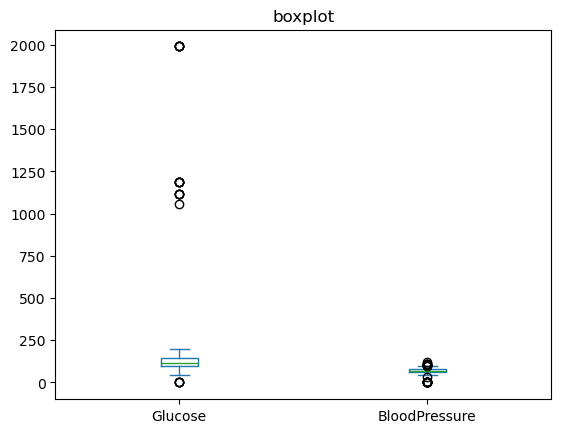

In [77]:
#Finding the outliers  of db_new
db_new[['Glucose', 'BloodPressure']].plot(kind='box', title='boxplot')
#using box plot 

<Axes: xlabel='Pregnancies_updated'>

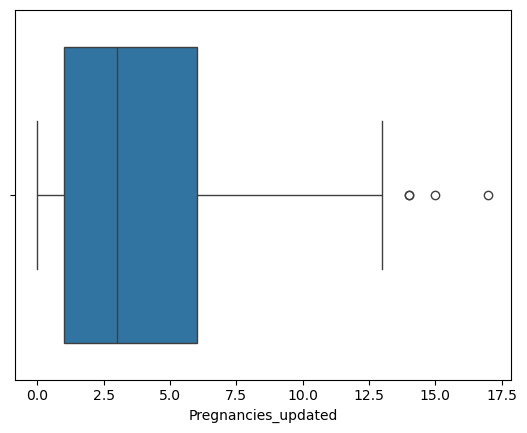

In [79]:
#Finding the outliers of Pregnacies_uppdated 
sns.boxplot(x=db_new['Pregnancies_updated'])

<Axes: xlabel='BloodPressure'>

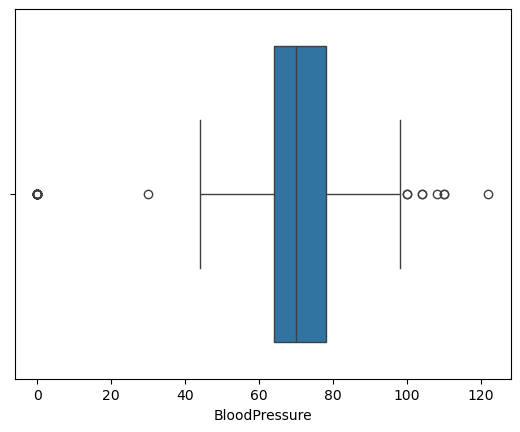

In [83]:
#finding the outliter of Bloodpressure
sns.boxplot(x=db_new['BloodPressure'] )

<Axes: xlabel='SkinThickness'>

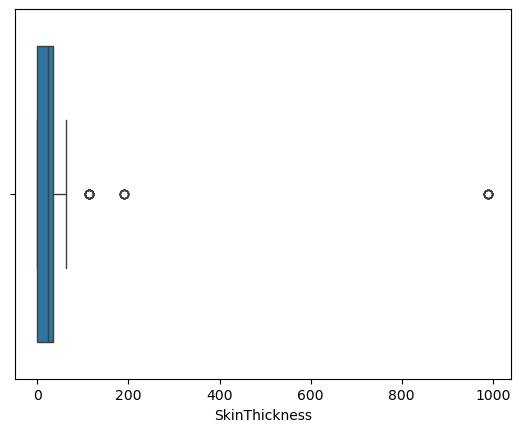

In [85]:
#finding the Outliers of Skinthickness 
sns.boxplot(x=db_new['SkinThickness'])

<Axes: xlabel='Insulin'>

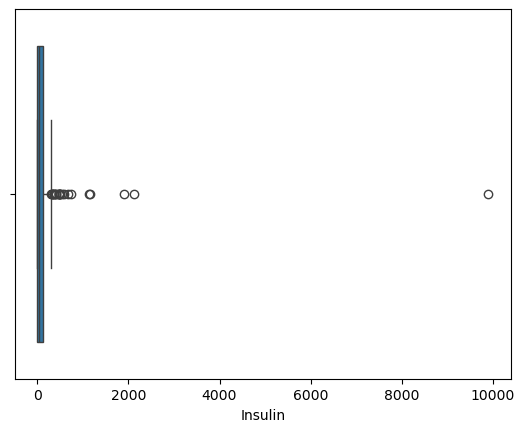

In [86]:
#finding the outliers of Insulin	
sns.boxplot(x=db_new['Insulin'])

<Axes: xlabel='BMI'>

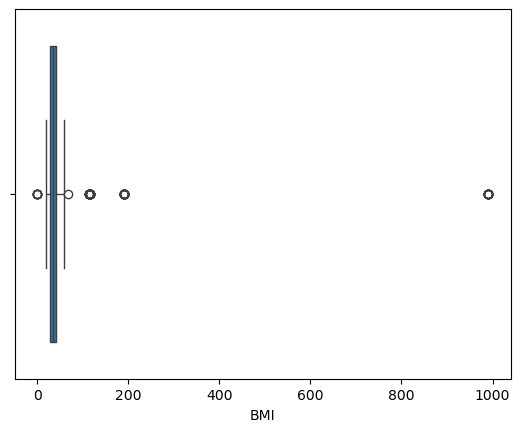

In [87]:
#finding the outliers of BMI
sns.boxplot(x=db_new['BMI'])

<Axes: xlabel='DiabetesPedigreeFunction'>

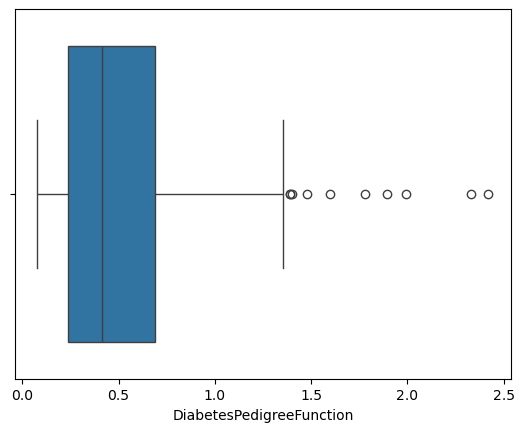

In [88]:
#finding the outliers of DiabetesPedigreeFunction
sns.boxplot(x=db_new['DiabetesPedigreeFunction'])

<Axes: xlabel='updated_Age'>

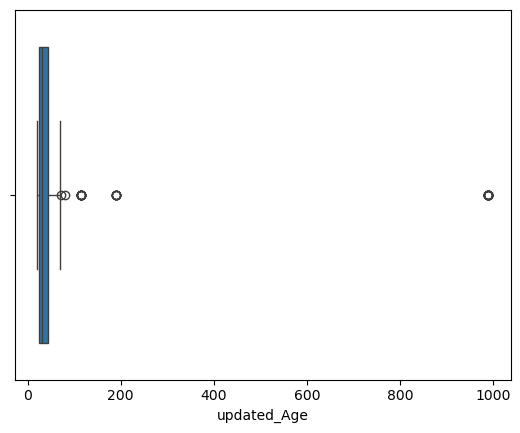

In [89]:
#finding the outliers of  updated_Age	
sns.boxplot(x=db_new['updated_Age'])

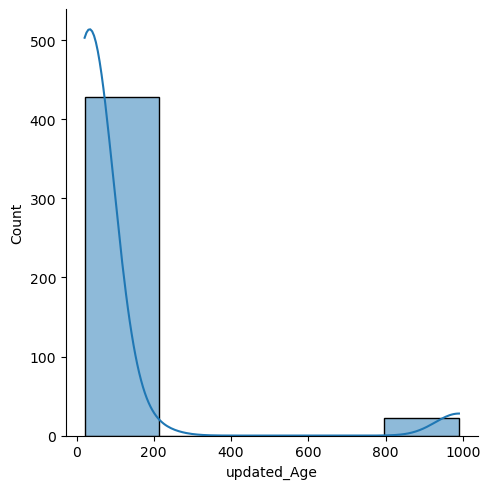

In [90]:
sns.displot(db_new['updated_Age'], bins = 5, kde = True)

<Axes: >

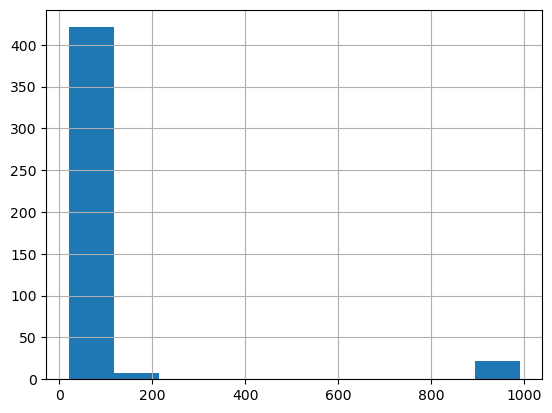

In [91]:
db_new['updated_Age'].hist()

<Axes: >

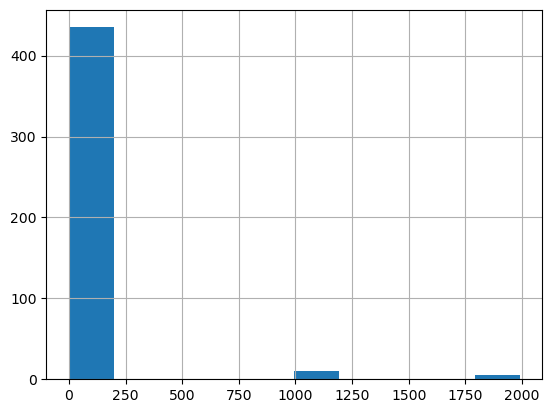

In [92]:
db_new['Glucose'].hist()

<Axes: title={'center': 'boxplot'}>

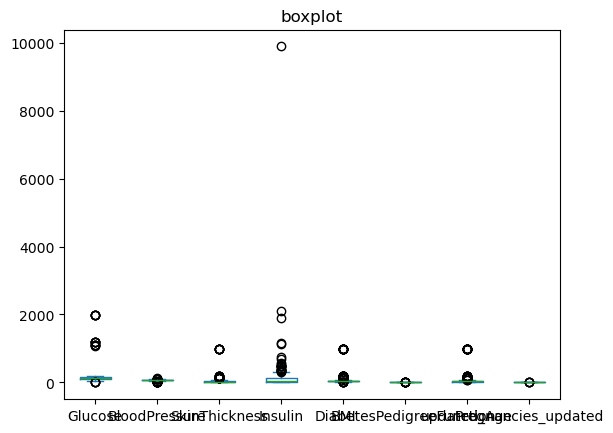

In [95]:
db_new[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'updated_Age', 'Pregnancies_updated']].plot(kind='box', title='boxplot')

<Axes: title={'center': 'Boxplot'}>

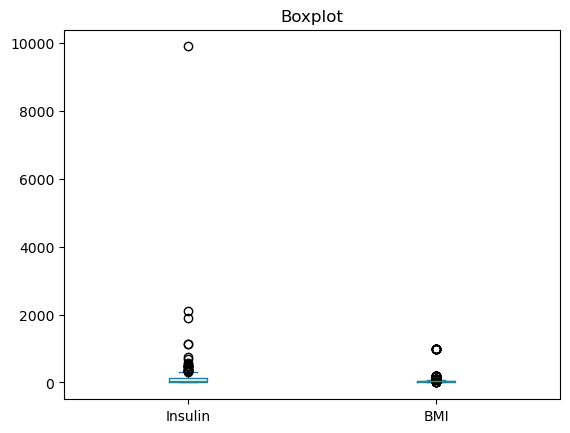

In [97]:
db_new[['Insulin', 'BMI']].plot(kind='box' ,title ='Boxplot')

In [99]:
#finding outliers using percentiles and quantiles
#outliers in 'Age_updated'
Q1 = db_new['updated_Age'].quantile(0.25)
Q3 = db_new['updated_Age'].quantile(0.75)

print(f"Q1 is: {Q1}     and     Q3 is {Q3}")

IQR = Q3 - Q1

print(IQR)

Q1 is: 24.0     and     Q3 is 43.0
19.0


In [100]:
#calculating upper and lower limits:
lower_lim = Q1 - (1.5 * IQR)
upper_lim = Q3 + (1.5 * IQR)

print(lower_lim)

print(upper_lim)

-4.5
71.5


In [103]:
#Remmoving the outliers of updatd_Age:
# Identifying the row index for those values that are beyond the boundaries

low_bound = (db_new['updated_Age'] < lower_lim)
up_bound = (db_new['updated_Age'] > upper_lim)

print(low_bound.value_counts())

print("-" * 20)

print(up_bound.value_counts())


updated_Age
False    450
Name: count, dtype: int64
--------------------
updated_Age
False    405
True      45
Name: count, dtype: int64


In [104]:
db_new.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'updated_Age', 'Pregnancies_updated'],
      dtype='object')

In [105]:
#finding the outliers of ' Glucose' using percentiles and Qunatiles:
Q1=db_new['Glucose'].quantile(0.25)
Q3=db_new['Glucose'].quantile(0.75)

print(f"Q1 is :{Q1} and Q3 is :{Q3}")


IQR=Q3-Q1

print(IQR)





Q1 is :99.25 and Q3 is :144.75
45.5


In [116]:
#calculating the lower and upper limits for 'Glucose'
low_lim=Q1-1.5*(IQR)
upper_lim=Q3+1.5*(IQR)

print("low_lim:",low_lim)

print("upper_lim:",upper_lim)

low_lim: 43.0
upper_lim: 99.0


In [109]:
#Removing the outliers of Glucose
low_bound = (db_new['Glucose'] < lower_lim)
up_bound = (db_new['Glucose'] > upper_lim)

print(low_bound.value_counts())

print("-" * 20)

print(up_bound.value_counts())


Glucose
False    450
Name: count, dtype: int64
--------------------
Glucose
True     439
False     11
Name: count, dtype: int64


In [110]:
#finding the outlers of pregnancies_updated
Q1=db_new['Pregnancies_updated'].quantile(0.25)
Q3=db_new['Pregnancies_updated'].quantile(0.75)

print(f" Q1 is :{Q1} and Q3 is : {Q3}")

IQR=Q3-Q1

print("IQR:",IQR)

 Q1 is :1.0 and Q3 is : 6.0
IQR: 5.0


In [117]:
#calculating the upper and lower limits:
upper_lim=Q3+1.5*(IQR)
lower_lim=Q1-1.5*(IQR)

print("low_lim:",low_lim)

print("upper_lim:",upper_lim)

low_lim: 43.0
upper_lim: 99.0


In [118]:
#Removing  the outliers of Pregnancies_updated:


low_bound = (db_new['Pregnancies_updated'] < lower_lim)
up_bound = (db_new['Pregnancies_updated'] > upper_lim)

print(low_bound.value_counts())

print("-" * 20)

print(up_bound.value_counts())


Pregnancies_updated
True    450
Name: count, dtype: int64
--------------------
Pregnancies_updated
False    450
Name: count, dtype: int64


In [120]:
#Finding the outliers in 'BloodPressure'
Q1=db_new['BloodPressure'].quantile(0.25)
Q3=db_new['BloodPressure'].quantile(0.75)

print(f"Q1 is :{Q1}  and Q3 is : {Q3}")

IQR=Q3-Q1

print("IQR:",IQR)



Q1 is :64.0  and Q3 is : 78.0
IQR: 14.0


In [121]:
#calculating the upper and lower limits
low_lim=Q1-1.5*(IQR)
upper_lim=Q3+1.5*(IQR)

print("low_lim:",low_lim)

print("upper_lim:",upper_lim)

low_lim: 43.0
upper_lim: 99.0


In [122]:
#removing the outliers from bloodPressure 

low_bound = (db_new['BloodPressure'] < lower_lim)
up_bound = (db_new['BloodPressure'] > upper_lim)

print(low_bound.value_counts())

print("-" * 20)

print(up_bound.value_counts())


BloodPressure
False    428
True      22
Name: count, dtype: int64
--------------------
BloodPressure
False    442
True       8
Name: count, dtype: int64


In [114]:
db_new.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'updated_Age', 'Pregnancies_updated'],
      dtype='object')

In [124]:
#finding the outliers in 'SkinThickness', 'Insulin', 'BMI':
Q1=db_new[['SkinThickness', 'Insulin', 'BMI']].quantile(0.25)
Q3=db_new[['SkinThickness', 'Insulin', 'BMI']].quantile(0.75)

print(f"Q1 is:{Q1} and Q3 is:{Q3}")

IQR=Q3-Q1

print("IQR:",IQR)


Q1 is:SkinThickness     0.000
Insulin           0.000
BMI              27.625
Name: 0.25, dtype: float64 and Q3 is:SkinThickness     35.00
Insulin          121.50
BMI               41.95
Name: 0.75, dtype: float64
IQR: SkinThickness     35.000
Insulin          121.500
BMI               14.325
dtype: float64


In [125]:

#calculating the upper and lower limits
low_lim=Q1-1.5*(IQR)
upper_lim=Q3+1.5*(IQR)

print("low_lim:",low_lim)

print("upper_lim:",upper_lim)




low_lim: SkinThickness    -52.5000
Insulin         -182.2500
BMI                6.1375
dtype: float64
upper_lim: SkinThickness     87.5000
Insulin          303.7500
BMI               63.4375
dtype: float64


In [126]:
#Removing the outliers of 'SkinThickness', 'Insulin', 'BMI':
low_bound = (db_new[['SkinThickness', 'Insulin', 'BMI']] < lower_lim)
up_bound = (db_new[['SkinThickness', 'Insulin', 'BMI']] > upper_lim)

print(low_bound.value_counts())

print("-" * 20)

print(up_bound.value_counts())

SkinThickness  Insulin  BMI  
True           True     True     170
               False    True     146
               True     False     50
               False    False     34
False          False    True      27
                        False     11
               True     False      6
                        True       6
Name: count, dtype: int64
--------------------
SkinThickness  Insulin  BMI  
False          False    False    348
                        True      55
               True     False     21
True           False    False     17
                        True       6
False          True     True       2
True           True     True       1
Name: count, dtype: int64


In [133]:
#finding the outliers of DiabetesPedigreeFunction':
Q1=db_new['DiabetesPedigreeFunction'].quantile(0.25)
Q3=db_new['DiabetesPedigreeFunction'].quantile(0.75)

print(f"Q1 is :{Q1} and Q3 is : {Q3}")

IQR=Q3-Q1

print("IQR:",IQR)

Q1 is :0.237 and Q3 is : 0.6867500000000001
IQR: 0.4497500000000001


In [136]:
#calculating the lower and upper limit:
Upper_lim=Q3+1.5*(IQR)
Lower_lim=Q1-1.5*(IQR)

print("Low_lim:",Lower_lim)

print("Upper_lim:",Upper_lim)



Low_lim: -0.43762500000000015
Upper_lim: 1.3613750000000002


In [137]:
#removing the outlier of DiabetesPedigreeFunction':

low_bound = (db_new['DiabetesPedigreeFunction'] < Lower_lim)
up_bound = (db_new['DiabetesPedigreeFunction'] > Upper_lim)

print(low_bound.value_counts())

print("-" * 20)

print(up_bound.value_counts())

DiabetesPedigreeFunction
False    450
Name: count, dtype: int64
--------------------
DiabetesPedigreeFunction
False    440
True      10
Name: count, dtype: int64


In [139]:
db_new.value_counts()

Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  updated_Age  Pregnancies_updated
0.0      48.0           20.0           0.0      24.7  0.1400                    22           1                      1
145.0    0.0            0.0            0.0      44.2  0.6300                    114          0                      1
138.0    0.0            0.0            0.0      36.3  0.9330                    25           0                      1
137.0    108.0          0.0            0.0      48.8  0.2270                    37           5                      1
         84.0           27.0           0.0      27.3  0.2114                    59           0                      1
                                                                                                                   ..
105.0    0.0            0.0            0.0      0.0   0.3050                    24           7                      1
104.0    76.0           0.0            0.0      18.4  0.5820 

In [160]:


db_new
 

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,updated_Age,Pregnancies_updated
0,148.0,72.0,35.0,0.0,33.6,0.6270,50,6
27,97.0,66.0,15.0,140.0,23.2,0.4870,22,1
29,117.0,92.0,0.0,0.0,190.1,0.3370,38,5
31,1058.0,76.0,36.0,245.0,114.6,0.8510,28,3
32,88.0,58.0,11.0,54.0,24.8,0.9907,22,3
...,...,...,...,...,...,...,...,...
494,80.0,0.0,0.0,0.0,0.0,0.1740,22,3
495,166.0,74.0,0.0,0.0,990.6,0.3040,66,6
496,110.0,68.0,0.0,0.0,990.0,0.2920,30,5
497,81.0,72.0,15.0,76.0,30.1,0.5470,25,2


In [161]:
db_num

0      Yes
27      NO
29      NO
31     Yes
32      NO
      ... 
494     NO
495     NO
496     NO
497     NO
498    Yes
Name: Outcome, Length: 450, dtype: object

In [170]:
dc=db_new.corr()
dc

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,updated_Age,Pregnancies_updated
Glucose,1.000000,0.045245,-0.022075,0.021786,-0.022068,-0.010537,0.000484,0.070142
BloodPressure,0.045245,1.000000,0.041170,0.040360,0.040047,0.023454,-0.022131,0.149116
SkinThickness,-0.022075,0.041170,1.000000,0.033894,0.064655,0.018057,-0.029504,0.019715
Insulin,0.021786,0.040360,0.033894,1.000000,-0.021722,0.131704,-0.000809,-0.044482
BMI,-0.022068,0.040047,0.064655,-0.021722,1.000000,-0.051164,-0.030284,0.048492
DiabetesPedigreeFunction,-0.010537,0.023454,0.018057,0.131704,-0.051164,1.000000,-0.055330,-0.009032
updated_Age,0.000484,-0.022131,-0.029504,-0.000809,-0.030284,-0.055330,1.000000,-0.105898
Pregnancies_updated,0.070142,0.149116,0.019715,-0.044482,0.048492,-0.009032,-0.105898,1.000000


<Axes: >

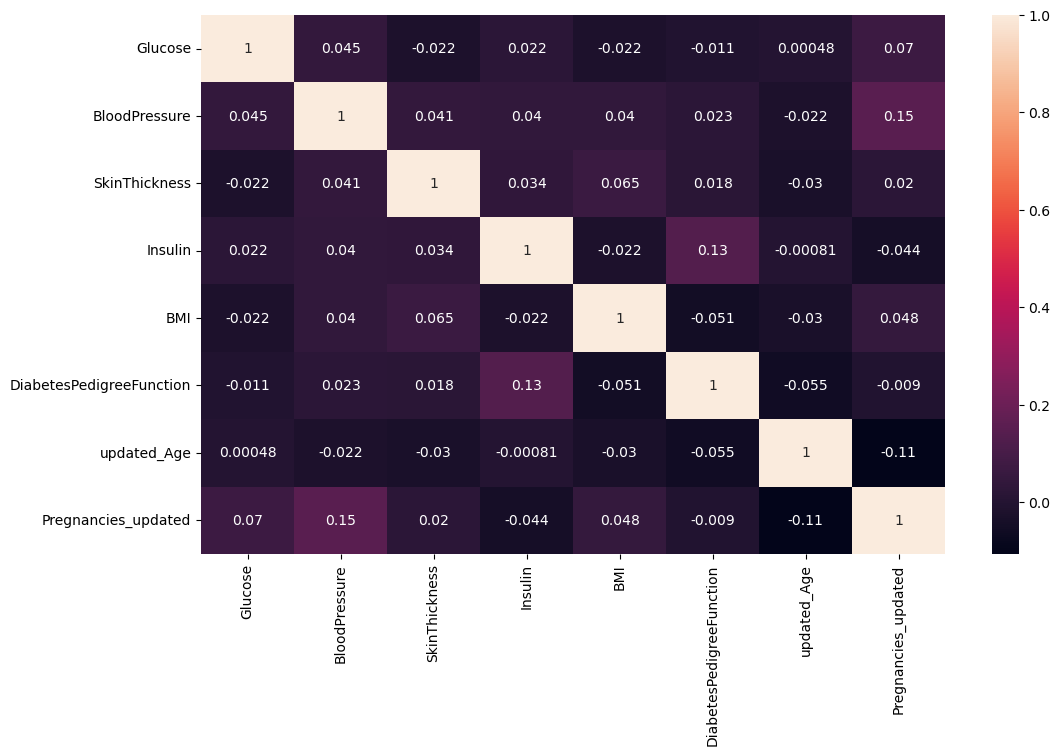

In [171]:
plt.figure(figsize=(12,7))
sns.heatmap(dc, annot = True)

<Axes: >

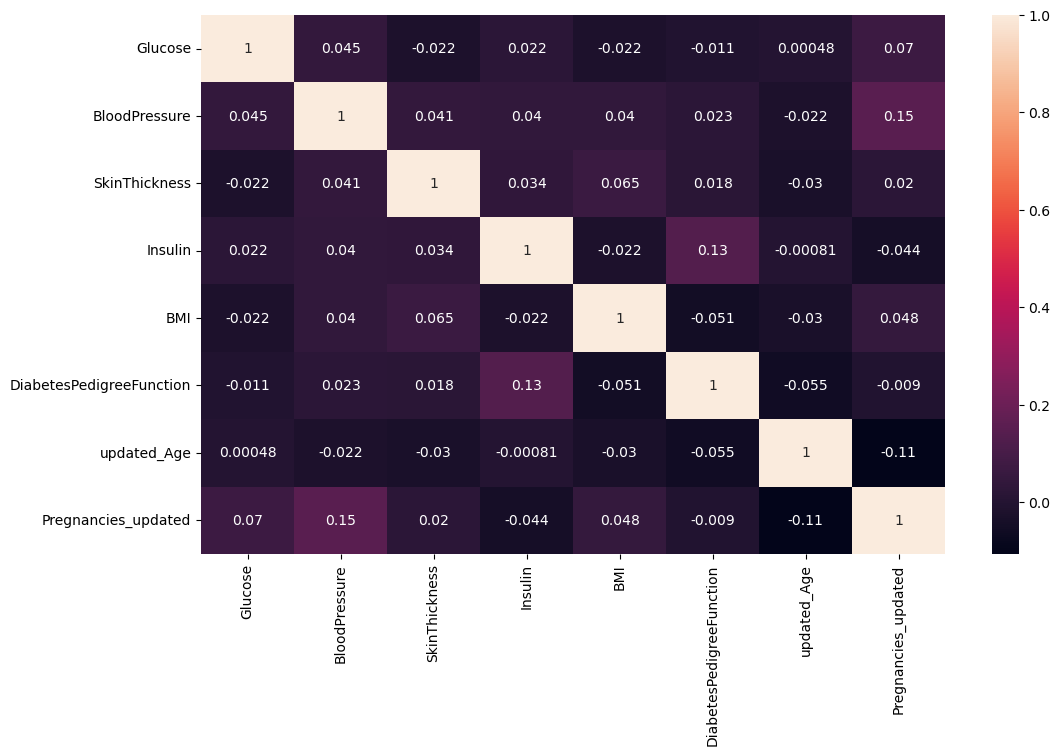

In [167]:
plt.figure(figsize=(12,7))
sns.heatmap(db_new.corr(), annot = True)

array([[<Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>,
        <Axes: title={'center': 'SkinThickness'}>],
       [<Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'DiabetesPedigreeFunction'}>],
       [<Axes: title={'center': 'updated_Age'}>,
        <Axes: title={'center': 'Pregnancies_updated'}>, <Axes: >]],
      dtype=object)

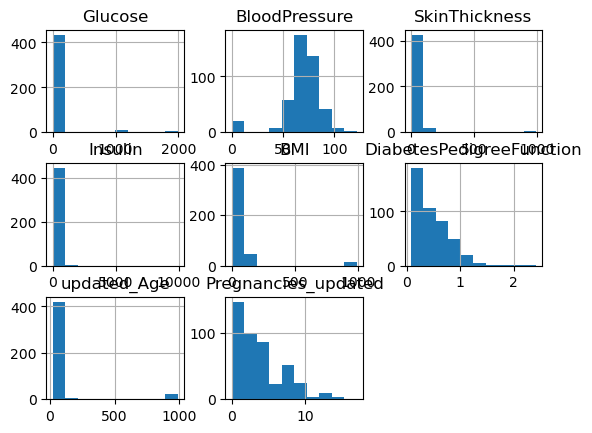

In [172]:
#Visualization of dataframe:
db_new.hist()

<Axes: >

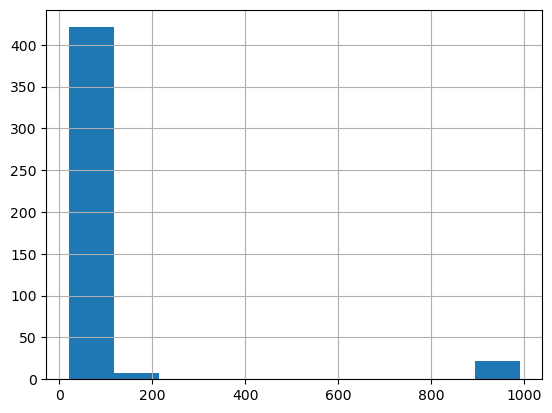

In [173]:
#Histogram of Age:
db_new['updated_Age'].hist()

<Axes: >

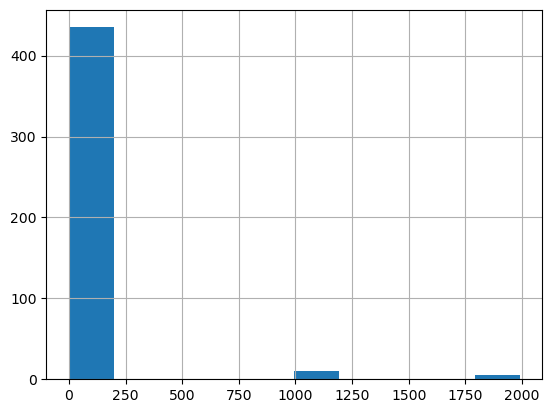

In [174]:
#Histogram of 'Glucose':
db_new['Glucose'].hist()

<Axes: >

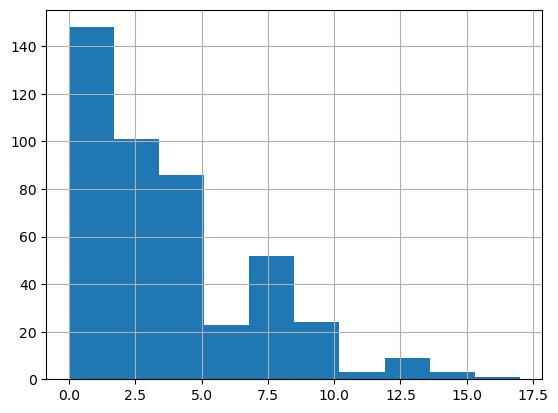

In [176]:
#Histogram of 'Pragnancies_updated':
db_new['Pregnancies_updated'].hist()

<Axes: >

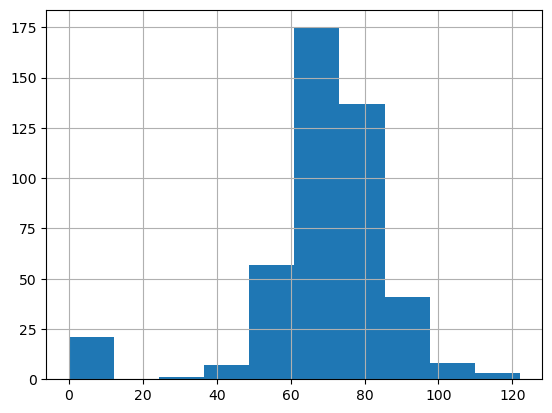

In [177]:
#Histogram of 'BloodPressure'
db_new['BloodPressure'].hist()

<Axes: >

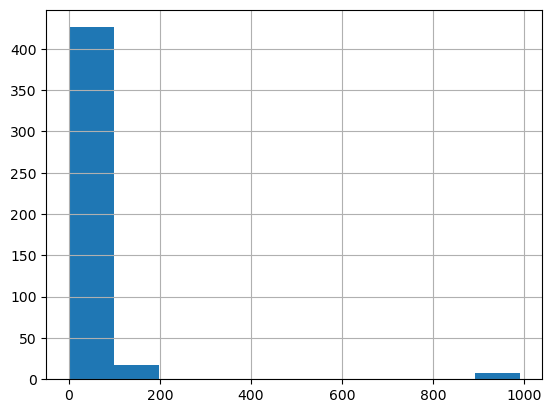

In [178]:
#Histogram of 'SkinThickness'
db_new['SkinThickness'].hist()

<Axes: >

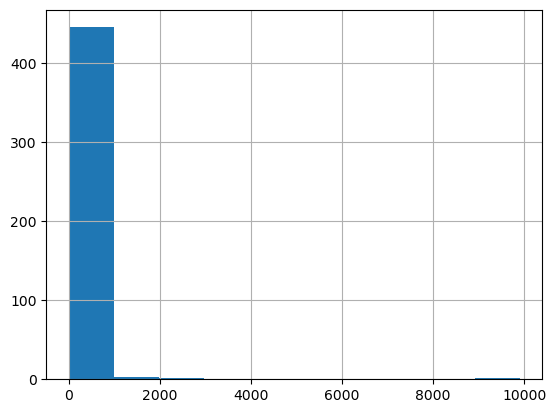

In [179]:
#Histogram of Insulin'
db_new['Insulin'].hist()

<Axes: >

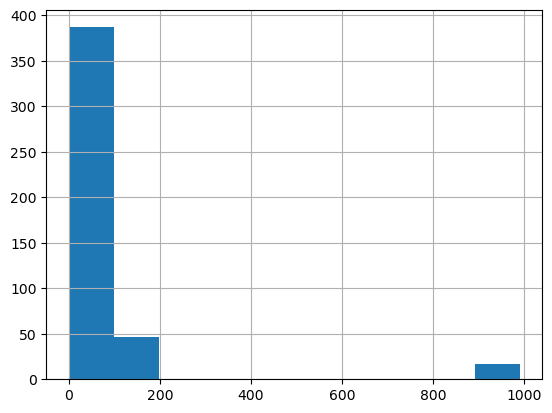

In [180]:
#Histogram of BMI'
db_new['BMI'].hist()

<Axes: >

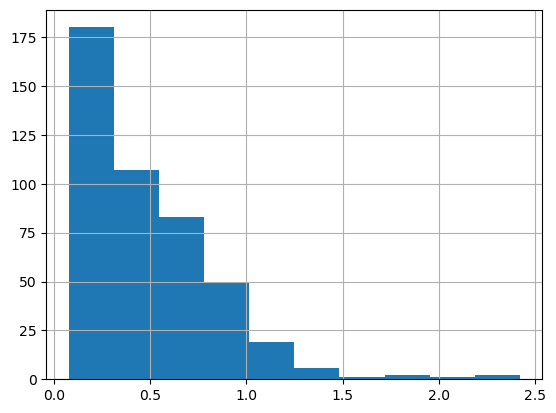

In [181]:
#Histogram of DiabetesPedigreeFunction
db_new['DiabetesPedigreeFunction'].hist()

In [189]:
import scipy as sp
import scipy.stats
scipy.stats.skew(db_new, axis = 0, bias = True)
sk=list(scipy.stats.skew(db_new, axis = 0, bias = True))
sk


[5.825906655425177,
 -1.9186351990555968,
 7.2221571795689945,
 17.253032288157517,
 4.490044418817163,
 1.6341525103921586,
 4.0803366429588905,
 0.9972188510627706]

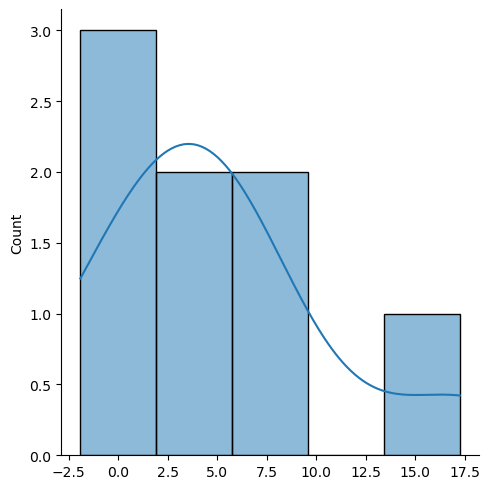

In [190]:
sns.displot(sk, bins = 5, kde = True)

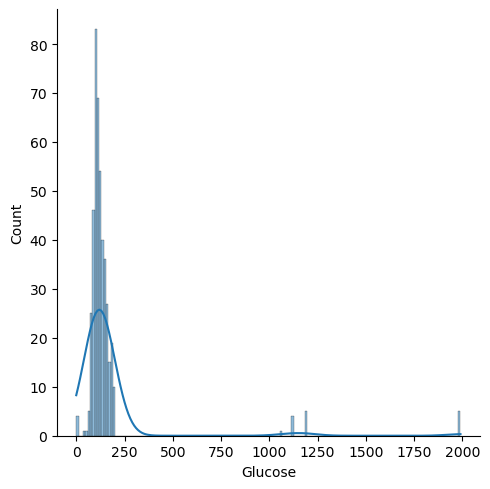

In [197]:
sns.displot(db_new['Glucose'],kde=True)

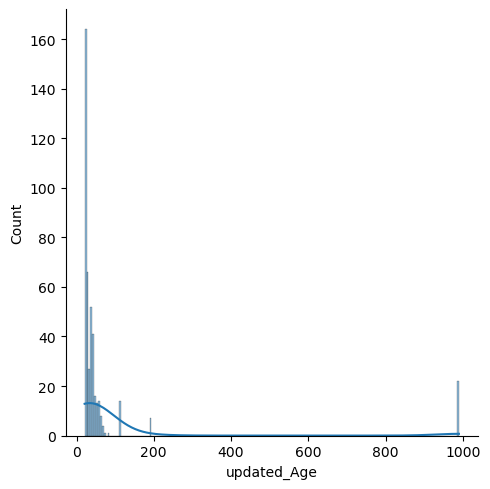

In [198]:
sns.displot(db_new['updated_Age'],kde=True)

AttributeError: Rectangle.set() got an unexpected keyword argument 'rwidth'

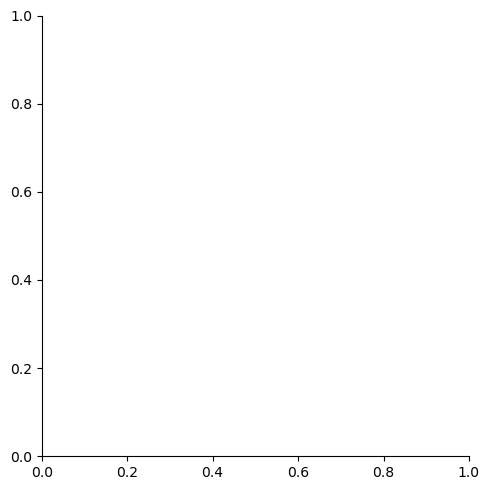

In [204]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

sns.displot(db_new.updated_Age, bins=10, rwidth=0.8, density=True)

In [214]:
#kurtosis of updated_Age:
from scipy.stats import kurtosis
kurtosis(db_new['updated_Age'])



14.918928183070179

Text(0.5, 0, 'updated_Age')

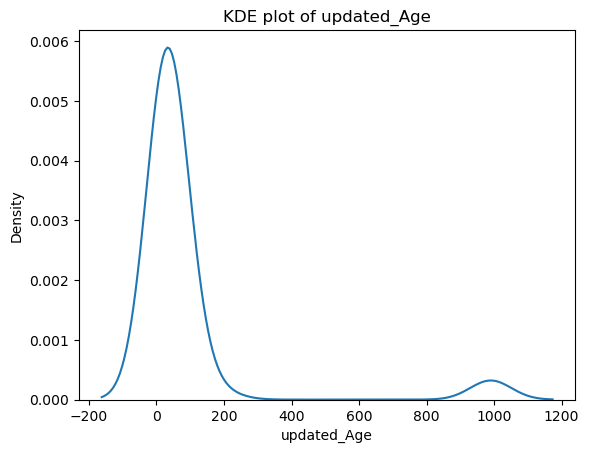

In [215]:
sns.kdeplot(db_new['updated_Age'])

plt.title("KDE plot of updated_Age")
plt.xlabel("updated_Age")

In [220]:
#Kurtosis of Glucose:
from scipy.stats import skew
skew(db_new['Glucose'])


5.825906655425177

In [221]:
from scipy.stats import kurtosis
kurtosis(db_new['Glucose'])


35.327379129477606

Text(0.5, 0, 'Glucose')

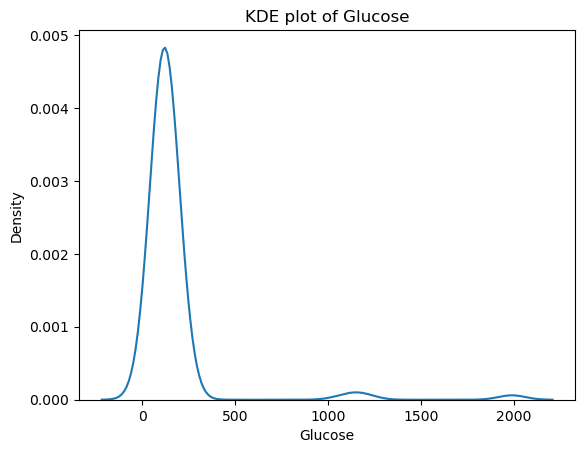

In [222]:
sns.kdeplot(db_new['Glucose'])

plt.title("KDE plot of Glucose")
plt.xlabel("Glucose")

In [223]:
db_new.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'updated_Age', 'Pregnancies_updated'],
      dtype='object')

In [224]:
#kurtosis of "BloodPressure'
from scipy.stats import skew
skew(db_new['BloodPressure'])


-1.9186351990555968

In [225]:

from scipy.stats import kurtosis
kurtosis(db_new['BloodPressure'])


5.596501567171682

Text(0.5, 0, " 'BloodPressure'")

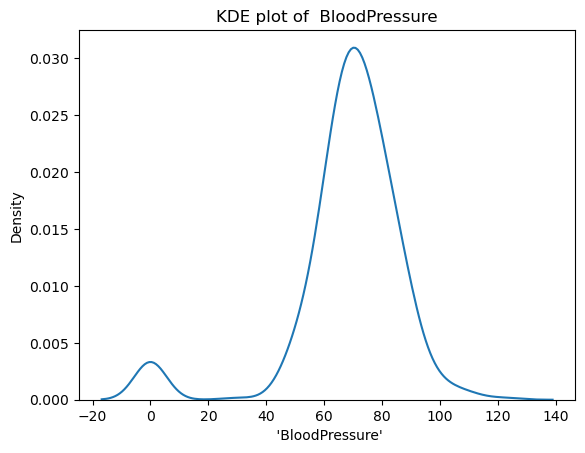

In [227]:
sns.kdeplot(db_new[ 'BloodPressure'])

plt.title("KDE plot of  BloodPressure")
plt.xlabel(" 'BloodPressure'")

In [228]:
#Kurtosis of SkinThickness'
from scipy.stats import skew
skew(db_new['SkinThickness'])


7.2221571795689945

In [229]:
from scipy.stats import kurtosis
kurtosis(db_new['SkinThickness'])


52.769708682791226

Text(0.5, 0, " 'SkinThickness'")

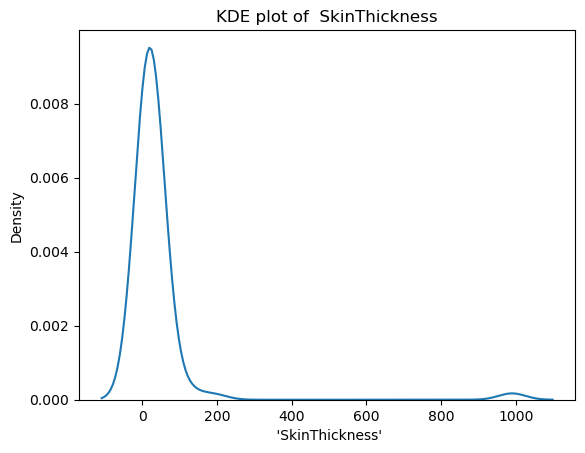

In [230]:
sns.kdeplot(db_new[ 'SkinThickness'])

plt.title("KDE plot of  SkinThickness")
plt.xlabel(" 'SkinThickness'")

In [234]:
#kurtosis of 'Insulin'
from scipy.stats import kurtosis
kurtosis(db_new['Insulin'])


17.253032288157517

In [235]:
skew(db_new['Insulin'])

17.253032288157517

Text(0.5, 0, " Insulin'")

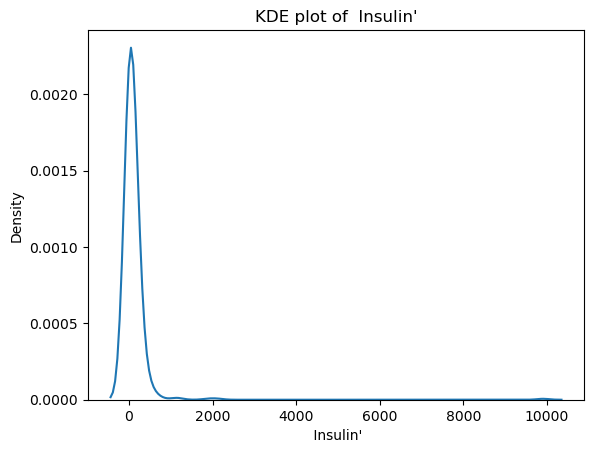

In [231]:
sns.kdeplot(db_new['Insulin'])

plt.title("KDE plot of  Insulin'")
plt.xlabel(" Insulin'")

Text(0.5, 0, " BMI''")

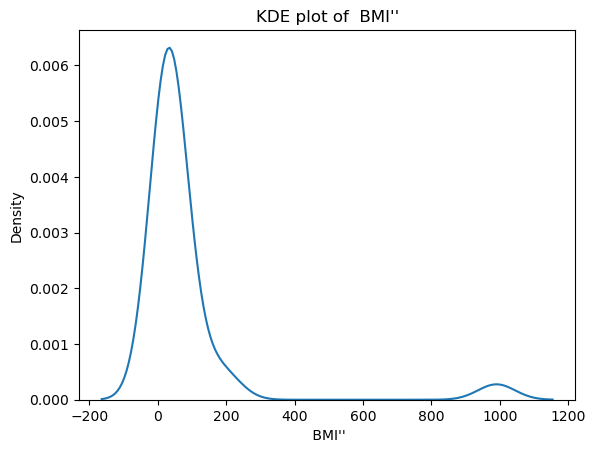

In [236]:
#kurotsis of BMI',
sns.kdeplot(db_new['BMI'])

plt.title("KDE plot of  BMI''")
plt.xlabel(" BMI''")

Text(0.5, 0, " 'DiabetesPedigreeFunction")

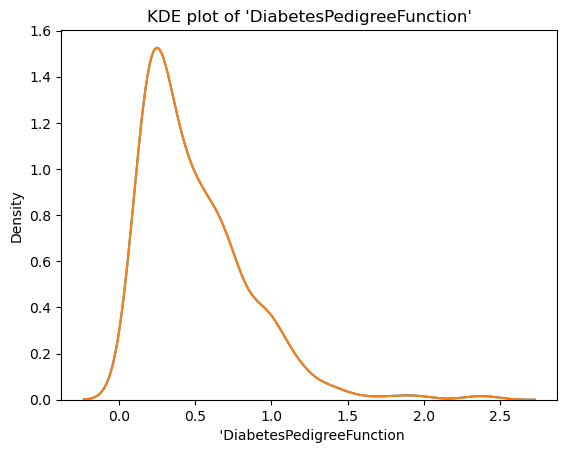

In [238]:
#Kurtosis of 'DiabetesPedigreeFunction'
sns.kdeplot(db_new['DiabetesPedigreeFunction'])
sns.kdeplot(db_new['DiabetesPedigreeFunction'])


plt.title("KDE plot of 'DiabetesPedigreeFunction'")
plt.xlabel(" 'DiabetesPedigreeFunction")

Text(0.5, 0, " 'Pregnancies_updated'")

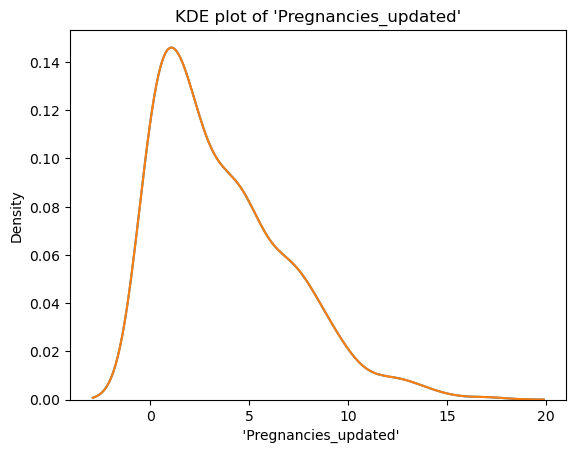

In [239]:
#KUrtosis of 
sns.kdeplot(db_new['Pregnancies_updated'])
sns.kdeplot(db_new['Pregnancies_updated'])


plt.title("KDE plot of 'Pregnancies_updated'")
plt.xlabel(" 'Pregnancies_updated'")